# <center> Assignment 1 - Perceptron Learning
###### Author: Rudraksh Kapil - 177154
In this notebook the following two tasks are accomplished:
1. Perceptron learning algorithm on Iris Dataset for binary classification
2. Getting the weight values for AND, OR, and XOR gates.

### 1. Learning Algortihm for Iris Dataset

In [348]:
# import statements
from sklearn import datasets                           # only used to get the dataset
from sklearn.model_selection import train_test_split   # only used to split the train and test data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

###### Get Iris Dataset and remove on of the classes.
Iris is sorted in order and it has 3 classes -> 50 class1, 50 class2, 50 class3. Therefore we need to only slice the iris dataset an extract the first 100 elements to get 50 of c1 and c2.

We do this because a single perceptron can only do binary classification.

In [349]:
iris = datasets.load_iris() 
X = iris.data[:100]
y = iris.target[:100]

# split the dataset randomly so we can test our algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Visualise Data 
Confirming if it is linearly separable.

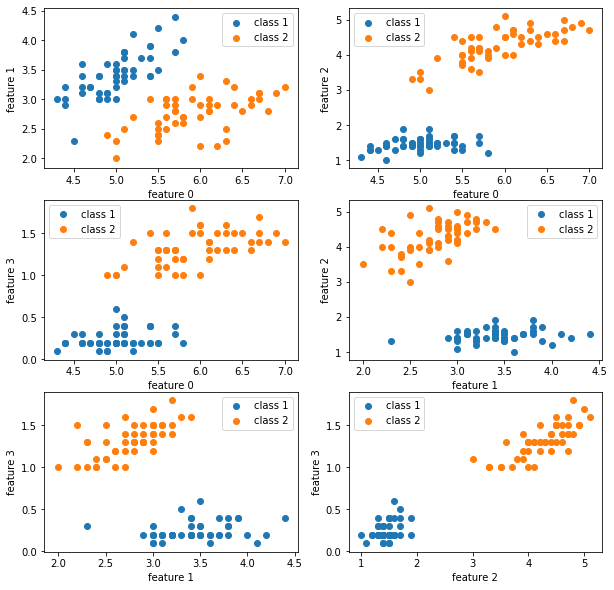

You can see that the data is linearly seperable overall becuase it is so for every pair of dimensions.


In [350]:
k = 1 # subplot counter
plt.figure(figsize=(10,10))  # set fig dimensions

# nc2 number of feature pairs = 6
for i in range(0,4):         # x axis feature
    for j in range(i+1, 4):  # y axis feature 
        
        # change subplot
        plt.subplot(3,2,k)   
        
        # plot values of the features classwise
        plt.scatter(X[:50,i], X[:50,j], label='class 1')
        plt.scatter(X[50:,i], X[50:,j], label='class 2')
        plt.xlabel(f'feature {i}')
        plt.ylabel(f'feature {j}')
        plt.legend()
        
        # update counter
        k += 1
        
plt.show()
print("You can see that the data is linearly seperable overall becuase it is so for every pair of dimensions.")

###### Define Training and Testing Functions

In [351]:
# training function of perceptron
def perceptron(features, labels, num_iter, alpha):
    # set weights randomly -> num_features + 1 for bias
    w = np.random.randn(1, features.shape[1]+1)
    
    # we use this to check correctness
    # the element at pos i represents the examples that were 
    #  wrongly classified at
    wrong_history = []  

    # loop over number of iterations
    for epoch in range(num_iter):
        
        # reset wrong counter
        wrong = 0          
        
        # loop over each example
        for X, label in zip(features, labels):
            
            # add bias feature at index 0
            X = np.insert(X,0,1)
            
            # y = W . X(t) -> run through perceptron
            y = np.dot(w, X.transpose())
            
            # target is either 1 or 0 only
            target = 1.0 if (y > 0) else 0.0     
            
            # get difference between target and actual
            delta = (label - target)             
            
            # misclassified -> update counter
            # and update w in reqd direction with learning rate alpha
            if delta != 0:                       
                wrong += 1                       
                w += (alpha * delta * X) 
                
        # upate history
        wrong_history.append(wrong)
                   
        # break early if everythings correct
        if wrong == 0:
            break
           
    # return weights and history
    return (w, wrong_history)

In [352]:
# function to check accuracy on test set - vectorised
def predict(X_test, y_test):
    
    # prepend a bias column of 1s to X 
    ones_col = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((ones_col, X_test), axis=1)

    # calculate predictions by running through perceptron
    y_pred = np.dot(w, X_test.transpose())
    
    # threshold:
    y_pred[y_pred > 0] = 1
    y_pred[y_pred <= 0] = 0

    # get accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy => {accuracy*100}%")
    
    # return predictions
    return y_pred

###### Run our algorithm by calling the above functions

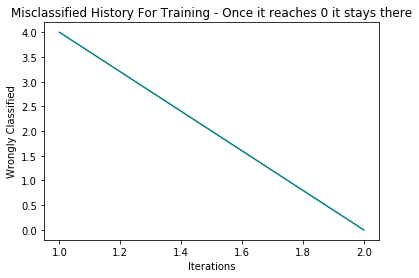

Test Accuracy => 100.0%


In [353]:
# set hyper parameters
num_iter = 5     # number of iterations
alpha = 0.5      # learning rate

# call traing to get the determined weights
w, wrong_history = perceptron(X_train, y_train,num_iter, alpha)

# plot history for training for analysis
epochs = np.arange(1, len(wrong_history)+1)
plt.plot(epochs, wrong_history, c='teal')
plt.title('Misclassified History For Training - Once it reaches 0 it stays there')
plt.xlabel('Iterations')
plt.ylabel('Wrongly Classified')
plt.show()

# check our implementation on the test set
y_preds = predict(X_test, y_test)

# 2. Solution For Logic Gates

###### Create Dataset
Truth Tables For Each, where the last column is the output

In [354]:
AND = np.asarray([(0,0,0),
                  (0,1,0),
                  (1,0,0),
                  (1,1,1)])

OR = np.asarray([(0,0,0),
                 (0,1,1),
                 (1,0,1),
                 (1,1,1)])

XOR = np.asarray([(0,0,0),
                  (0,1,1),
                  (1,0,1),
                  (1,1,0)])

###### Visualise Data and Expected Outputs
Here you can see the expected outputs according to the truth tables above.

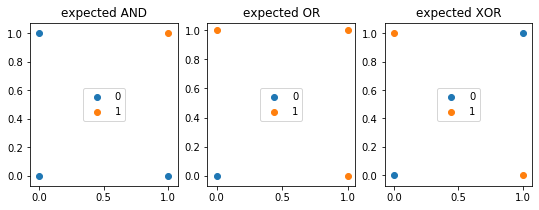

In [355]:
# set figure dimensions
plt.figure(figsize=(9,3))

# titles for each plot
titles = ['expected AND', 'expected OR', 'expected XOR']

# for each type of gate
for idx,gate in enumerate([AND, OR, XOR]):
    
    # change subplot
    plt.subplot(1,3,idx+1)
    plt.title(titles[idx])
    
    # X values are first 2 cols, y is final col (output)
    X = gate[:,:2]
    y = gate[:,-1]
    
    # separate the X values by output (for coloring in plots)
    X_zeros = X[y==0,:]
    X_ones  = X[y==1,:]
    
    # plot X values and color as y value
    plt.scatter(X_zeros[:,0], X_zeros[:,1], label = '0')
    plt.scatter(X_ones[:,0], X_ones[:,1], label = '1')  
    plt.legend(loc='center')

plt.show()

###### Helper Function to Test Output
This function tests the weights that our perceptron calculates and plots the output accordingly.
The testing is done by determining if the output (last col of X) is actually correct like the expected output above. Additionally, if the weight vector `w` is passed, we can see the line that seperates the two classes. 

Note: Because we are randomly initialising the weights, the line is different each time, but it is always correct.

In [356]:
# definition for function to test weights
def plot_stuff(X, w=None):
    # set plot dimenstions
    plt.figure(figsize=(3,3))
    plt.title("Calculated Output")
    plt.ylim((-0.1,1.1))
    plt.xlim((-0.1,1.1))
    
    # split X by output value (last col)
    X_zeros = X[X[:,2] <= 0,:]
    X_ones  = X[X[:,2] > 0,:]

    # plot X with y (last col) as color
    plt.scatter(X_zeros[:,0], X_zeros[:,1], label = '0')
    plt.scatter(X_ones[:,0], X_ones[:,1], label = '1')  
    plt.legend(loc='center')
    
    # if weights are given then plot line
    if w is not None:
        # plot line -> y = mx + c
        plt.title("Calculated Output - Line shows classifier")
        line_x = np.linspace(-0.5,1.5,100)
        line_y = (w[0,1]*line_x+w[0,0]) / -w[0,2]
        plt.plot(line_x, line_y, '-r', label='classifier')
    
    plt.show()

###### Solution for AND
Here we run the perceptron function to calculate weights for `AND` gate, and then use these to plot the line that separated the outputs according to 1 or 0 correctly.

Bias, Weights => [[-1.3600714   1.28216955  0.54924452]]
Test Accuracy => 100.0%


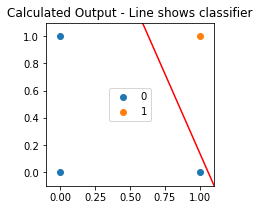

In [357]:
# get X and y
X = AND[:,0:2]
y = AND[:,2]

# solve to get weights
num_iter = 10
w, _ = perceptron(X, y, num_iter, alpha)
print(f"Bias, Weights => {w}")

# check accuracy on test set
y_preds = predict(X, y)

# plot to check
y_preds = np.asarray(y_preds).reshape(-1,1)
X = np.concatenate((X,y_preds), axis=1)
plot_stuff(X, w)

###### Solution for AND
Here we run the perceptron function to calculate weights for `OR` gate, and then use these to plot the line that separated the outputs according to 1 or 0 correctly.

Bias, Weights => [[-0.76640853  1.47175118  0.94544666]]
Test Accuracy => 100.0%


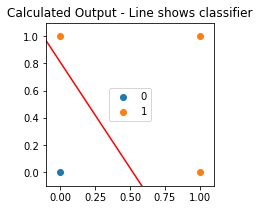

In [358]:
# get X and y
X = OR[:,0:2]
y = OR[:,2]

# solve to get weights
num_iter = 10
w, _ = perceptron(X, y, num_iter, alpha)
print(f"Bias, Weights => {w}")

# check accuracy on test set
y_preds = predict(X, y)

# plot to check
y_preds = np.asarray(y_preds).reshape(-1,1)
X = np.concatenate((X,y_preds), axis=1)
plot_stuff(X, w)

#### Solution for XOR
Solved by hand since two perceptrons required

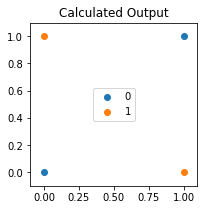

In [359]:
w00 = -1
w02 = 2
w04 = 2
w01 = 3
w03 = -2
w05 = -2
w10 = -3
w11 = 2
w12 = 2

# dummy X -> last col is updated in the next steps
X = np.asarray([(0,0,0),
                (0,1,0),
                (1,0,0),
                (1,1,0)])

# solve - first find a1 and a2 of hidden layer, then output
a1 = np.clip(w00 + w02*X[:,0] + w04*X[:,1], -1,1)
a2 = np.clip(w01 + w03*X[:,0] + w05*X[:,1], -1,1)
X[:,2] = w10 + w11*a1 + w12*a2

# plot
plot_stuff(X)

###### <center> END OF ASSIGNMENT <br><br> Author: Rudraksh Kapil - 177154 <br><br> Thanks for reading :)